In [2]:
#импортирую нужные библиотеки

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#импортирую нужные данные

taxi=pd.read_csv('https://stepik.org/media/attachments/lesson/360340/2_taxi_nyc.csv')

In [4]:
taxi

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


In [5]:
taxi.dtypes

pickup_dt        object
pickup_month     object
borough          object
pickups           int64
hday             object
spd             float64
vsb             float64
temp            float64
dewp            float64
slp             float64
pcp 01          float64
pcp 06          float64
pcp 24          float64
sd              float64
dtype: object

In [6]:
#переименовываю колонки

taxi=taxi.rename(columns={'pcp 01': 'pcp_01', 'pcp 06': 'pcp_06', 'pcp 24': 'pcp_24'})

In [7]:
#сколько было поездок в районах в разные месяцы? 

taxi \
    .groupby(['borough', 'pickup_month'], as_index=False) \
    .aggregate({'pickups': 'sum'}) \
    .sort_values('pickups', ascending=False)

,borough,pickup_month,pickups
21,Manhattan,Jun,1995388
23,Manhattan,May,1888800
19,Manhattan,Feb,1718571
22,Manhattan,Mar,1661261
18,Manhattan,Apr,1648278
20,Manhattan,Jan,1455543
9,Brooklyn,Jun,482466
11,Brooklyn,May,476087
6,Brooklyn,Apr,378095
10,Brooklyn,Mar,346726


In [8]:
#Сколько было поездок всего в Бруклине?

taxi["borough"].value_counts()["Brooklyn"]

4343

In [9]:
#Из какого района совершено больше всего поездок?

taxi.groupby('borough')['pickups'].sum().idxmax()

'Manhattan'

In [10]:
#создать новую колонку с градусами по Цельсию

def temp_to_celcius(temp):
    taxi.temp=(taxi.temp-32)*5/9
    return(taxi.temp)

In [11]:
taxi['temp_C'] = temp_to_celcius(taxi['temp'])
taxi['temp_C']

0        -1.111111
1        -1.111111
2        -1.111111
3        -1.111111
4        -1.111111
           ...    
29096    23.888889
29097    23.888889
29098    23.888889
29099    23.888889
29100    23.888889
Name: temp_C, Length: 29101, dtype: float64

In [12]:
# В каких районах по праздникам в среднем поступает больше заказов, чем в обычные дни? 

holiday = taxi.query('hday == "Y"').groupby(['borough'], as_index = False).agg({'pickups':'mean'})
weekday = taxi.query('hday == "N"').groupby(['borough'], as_index = False).agg({'pickups':'mean'})
for i in range(len(holiday)):
    if holiday.pickups[i] > weekday.pickups[i]:
        print(holiday.borough[i])

EWR
Queens


In [13]:
#Посчитать кол-во поездок по месяцам

pickups_by_mon_bor = taxi.groupby(['pickup_month', 'borough'], as_index=False)\
        .aggregate({'pickups': 'sum'})\
        .sort_values('pickups', ascending=False)

In [14]:
pickups_by_mon_bor

,pickup_month,borough,pickups
21,Jun,Manhattan,1995388
33,May,Manhattan,1888800
9,Feb,Manhattan,1718571
27,Mar,Manhattan,1661261
3,Apr,Manhattan,1648278
15,Jan,Manhattan,1455543
19,Jun,Brooklyn,482466
31,May,Brooklyn,476087
1,Apr,Brooklyn,378095
25,Mar,Brooklyn,346726


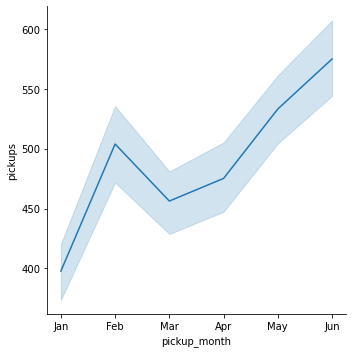

In [19]:
#Визуализирую кол-во поездок в зависимости от месяца с доверительными интервалами

sns.relplot(x="pickup_month", y="pickups", kind="line", data=taxi)

In [17]:
#Сохранить название района с наименьшим числом поездок в переменную min_pickups

min_pickups=taxi.groupby('borough')['pickups'].sum().idxmin()

In [18]:
min_pickups

'EWR'

In [19]:
#импортирую другой датасет поездок такси

taxi2=pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [24]:
#с какого устройства было заказано больше всего такси?

taxi2 \
      .groupby('source', as_index=False) \
      .agg({'journey_id': 'count'}) \
      .sort_values(by='journey_id', ascending=False) \
      .rename(columns={'journey_id': 'orders_count'}) \
      .assign(share_orders=lambda x: x['orders_count'] * 100 / x['orders_count'].sum()) \
      .head(1) \
      .round()

,source,orders_count,share_orders
3,iPhone,9741,42.0


In [30]:
#как распределены оценки водителей (driver_score)?

driver_score_counts = taxi2 \
    .driver_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index':'driver_score', 'driver_score':'percentage'}) \
    .sort_values('driver_score', ascending=False)

In [31]:
driver_score_counts

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
3,3.0,2.97
5,2.0,0.81
4,1.0,1.23
2,0.0,14.30


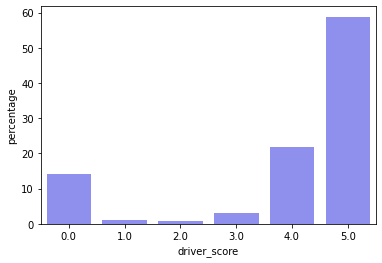

In [34]:
pic1 = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)

In [35]:
#как распределены оценки клиентов (rider_score)?

rider_score_counts = taxi2 \
    .rider_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index':'rider_score', 'rider_score':'percentage'}) \
    .sort_values('rider_score', ascending=False)

In [36]:
rider_score_counts

,rider_score,percentage
0,5.0,87.10
1,4.0,8.83
3,3.0,1.38
5,2.0,0.19
4,1.0,0.21
2,0.0,2.29


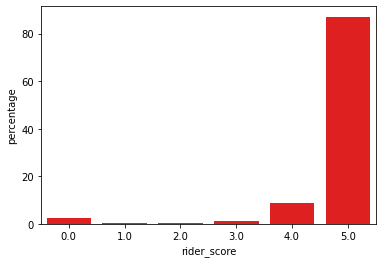

In [37]:
pic2 = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='red', alpha=1)